In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('E:\\program files\\Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_outcome = pd.crosstab(index=iris['Species'], columns='Count')
iris_outcome

col_0,Count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [6]:
iris_setosa = iris.loc[iris['Species']=='Iris-setosa']
iris_versicolor = iris.loc[iris['Species']=='Iris-versicolor']
iris_virginica = iris.loc[iris['Species']=='Iris-virginica']


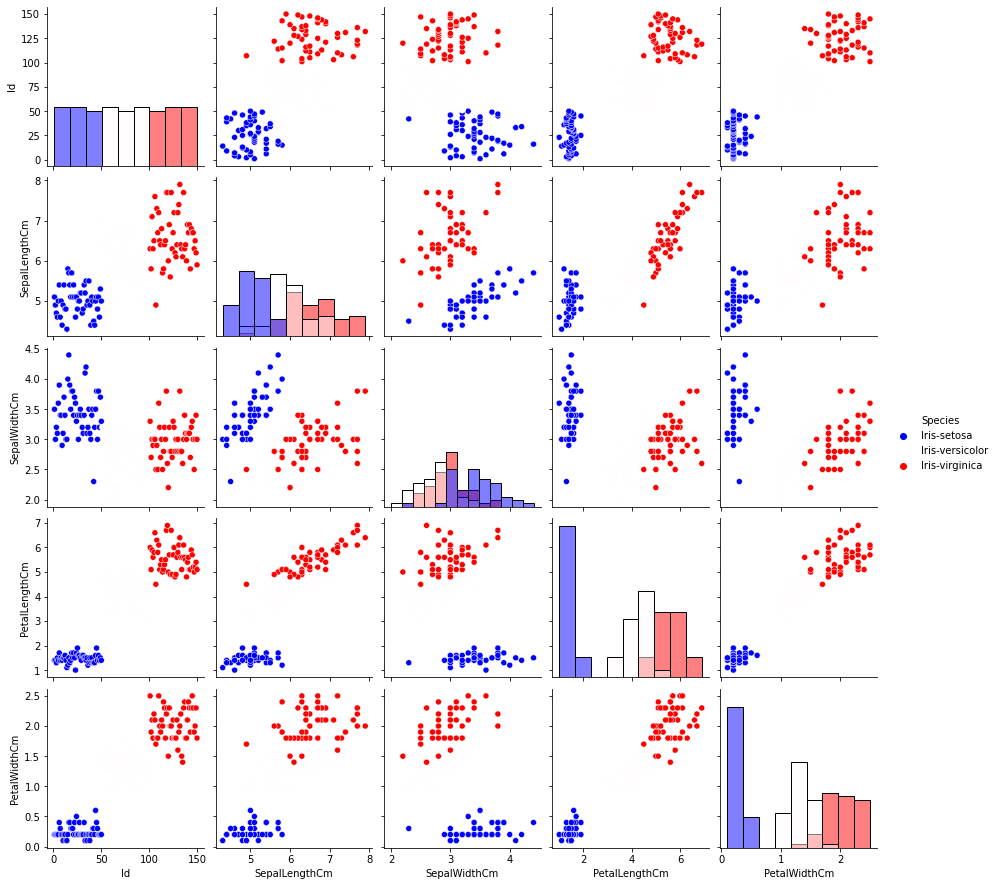

In [7]:
sns.pairplot(data=iris, hue='Species', palette='seismic', diag_kind='hist')

In [8]:
from sklearn.cluster import KMeans

In [9]:
x = iris.iloc[:,[0,1,2,3]].values
y = iris['Species']
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = "k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

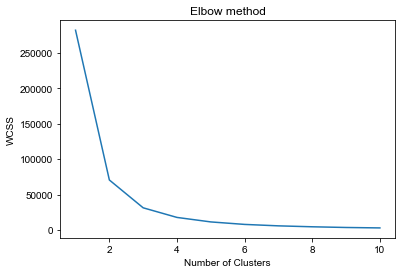

In [10]:
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
sns.set_style('darkgrid')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, init = "k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(iris.drop(['Id','Species'], axis=1))

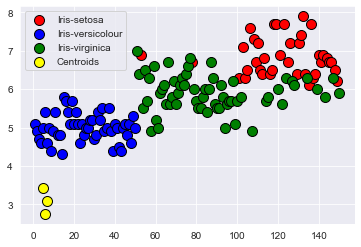

In [12]:
#Visulization of clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa', edgecolors='black')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour', edgecolors='black')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica', edgecolors='black')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids', edgecolors='black')

plt.legend()